## алгоритм управления роем беспилотников, чтобы они могли формирвать заданную фигуру в небе

Конечно! Я с удовольствием расскажу об алгоритме управления роем беспилотников, который позволяет им формировать заданную фигуру в небе.

**Общая идея:**

Для того чтобы рой беспилотников мог сформировать заданную фигуру, необходимо разработать алгоритм, который будет управлять их позициями и движениями таким образом, чтобы каждый дрон занял правильное место в этой фигуре, и при этом обеспечивалось безопасное расстояние между дронами, избегая столкновений.

**Основные задачи:**

1. **Декомпозиция фигуры:** Разделить заданную фигуру на отдельные целевые позиции для каждого дрона.

2. **Назначение целей:** Определить, какой дрон какую позицию будет занимать.

3. **Планирование траекторий:** Спланировать безопасный маршрут для каждого дрона от текущей позиции до целевой.

4. **Избежание столкновений:** Обеспечить, чтобы дроны не сталкивались друг с другом во время движения.

5. **Синхронизация:** Координировать движение дронов, чтобы они достигли своих позиций одновременно.

**Элементы алгоритма:**

1. **Формирование матрицы целевых позиций:**

   - Заданная фигура описывается в виде координат точек в трехмерном пространстве.
   - Например, если мы хотим сформировать слово или логотип, мы можем использовать векторную графику и получить из нее позиции.

2. **Алгоритм назначения задач (Task Assignment):**

   - Определить, какому дрону какая целевая позиция назначается.
   - Можно использовать методы оптимизации, например, алгоритм Венгерский (Hungarian Algorithm) для минимизации общей дистанции.

3. **Алгоритм управления движением:**

   - Каждый дрон планирует свою траекторию к целевой точке.
   - Используется алгоритм потенциалов или метод лидерства (Leader-Follower), либо метод виртуальных структур.

4. **Избежание столкновений:**

   - Дроны оснащены сенсорами и системами обнаружения близости.
   - Применяются правила отталкивания при слишком близком приближении.

5. **Системы связи:**

   - Дроны обмениваются информацией о своих позициях и скоростях для координации.

**Шаги алгоритма:**

1. **Инициализация:**

   - Собрать информацию о текущих позициях всех дронов.
   - Загрузить координаты целевой фигуры.

2. **Назначение целей:**

   - Использовать алгоритм оптимального сопоставления для минимизации суммарного пути.
   - Пример: решить задачу о назначениях с помощью Венгерского алгоритма.

3. **Планирование траекторий:**

   - Использовать планирование траекторий с учетом кинематических ограничений дрона.
   - Применить алгоритмы, такие как RRT* или A* для нахождения оптимального пути.

4. **Управление движением:**

   - Реализовать управление движением с учетом динамики дрона.
   - Использовать PID-регуляторы или более сложные управляющие алгоритмы.

5. **Избежание столкновений:**

   - Включить локальные правила избегания коллизий, похожие на правила в алгоритме Boids.
   - При обнаружении дрона вблизи, скорректировать траекторию.

6. **Синхронизация и завершение:**

   - Обеспечить синхронизацию времени прибытия к целевым точкам.
   - Когда все дроны достигнут своих позиций, поддерживать стабильность.

**Псевдокод алгоритма:**

```
input: текущие позиции дронов {P_i}, целевые позиции в фигуре {T_j}

1. Создать матрицу стоимости C размером N x N, где N - количество дронов
   для i от 1 до N:
       для j от 1 до N:
           C[i][j] = расстояние между P_i и T_j

2. Решить задачу о назначениях с помощью Венгерского алгоритма
   Получить соответствие: дрон i -> целевая позиция T_j

3. Для каждого дрона i:
   - Спланировать траекторию от P_i к T_j
   - Учесть ограничения по скорости и ускорению
   - Включить алгоритмы избегания препятствий и коллизий

4. Начать движение по спланированным траекториям
   пока дрон i не достигнет T_j:
       - Обновить положение и скорость дрона
       - Использовать сенсоры для обнаружения других дронов и препятствий
       - При необходимости корректировать траекторию
       - Обеспечить синхронизацию с другими дронами

5. Когда все дроны достигнут своих целевых позиций:
   - Поддерживать позицию и стабильность
```

**Пример кода на Python:**

Ниже приведен упрощенный пример кода, демонстрирующий основные идеи алгоритма. Для полноты функционала потребуется более сложная реализация, учитывающая реальные динамические модели дронов, коммуникацию и обработку сенсорных данных.


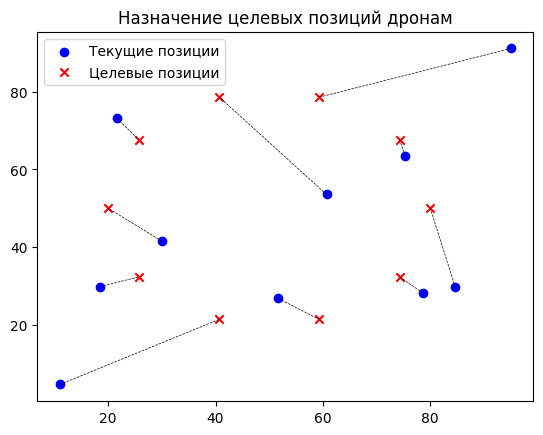

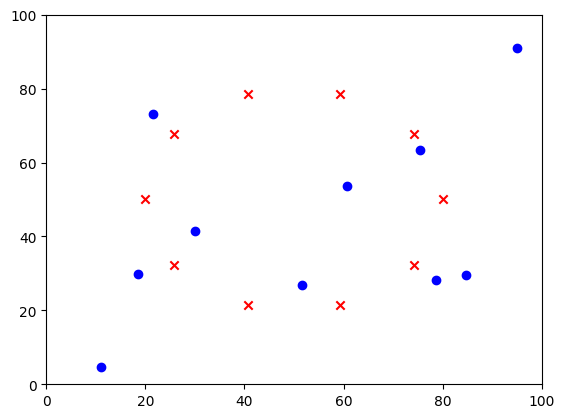

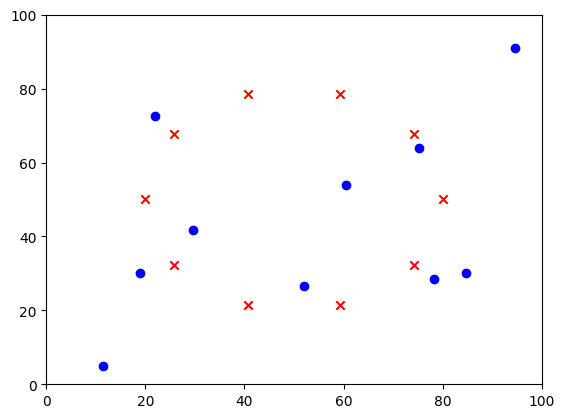

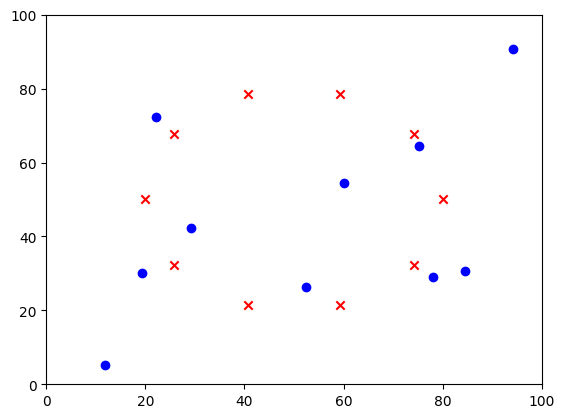

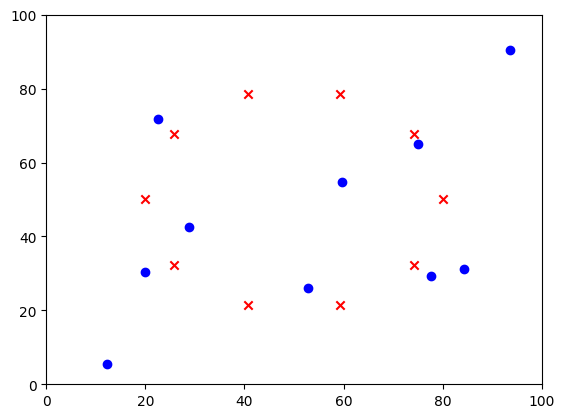

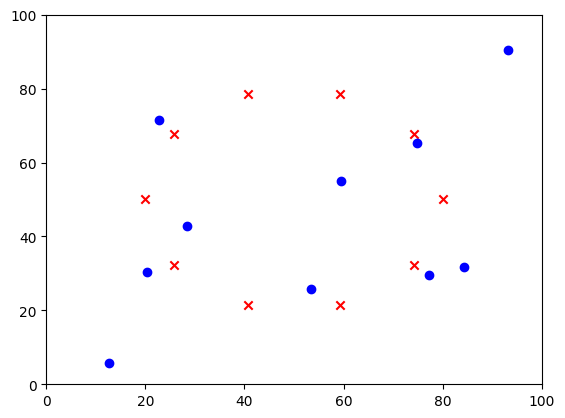

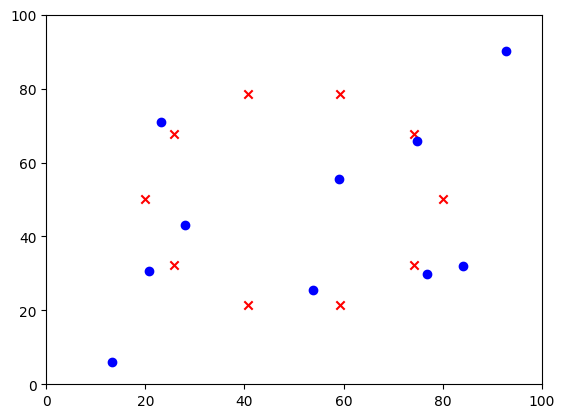

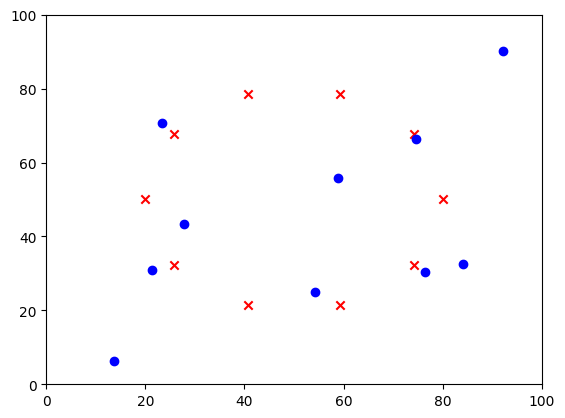

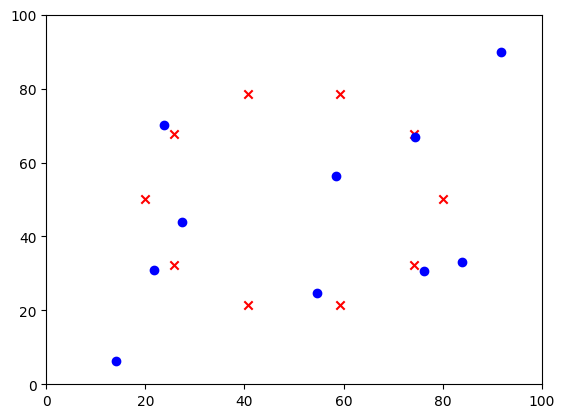

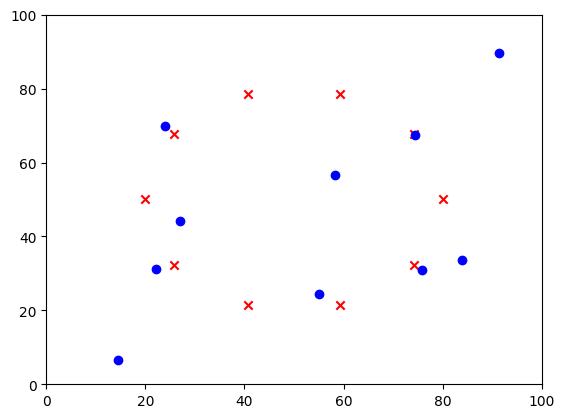

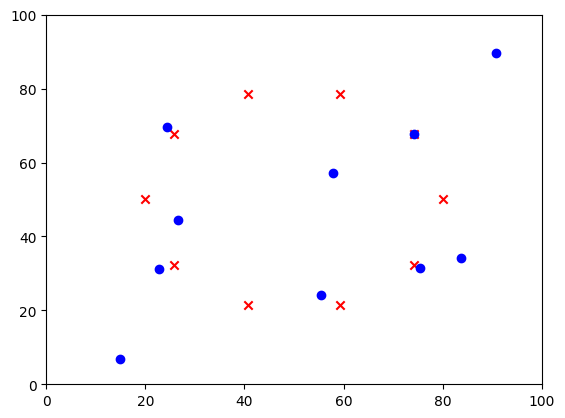

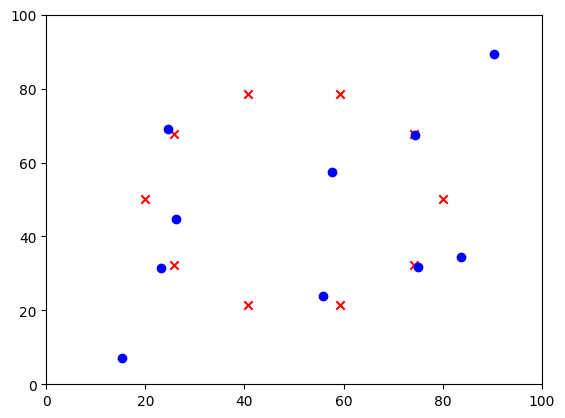

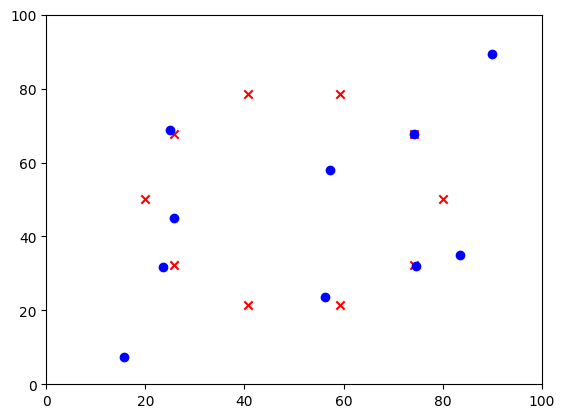

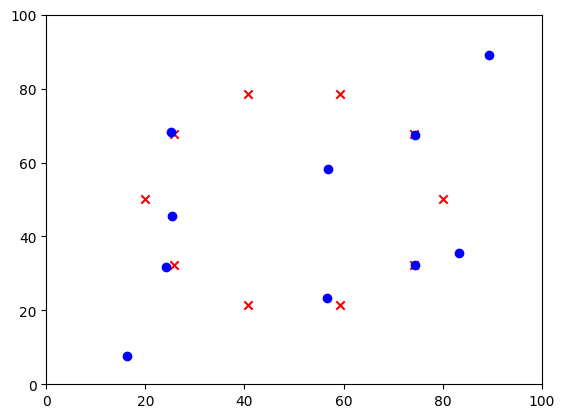

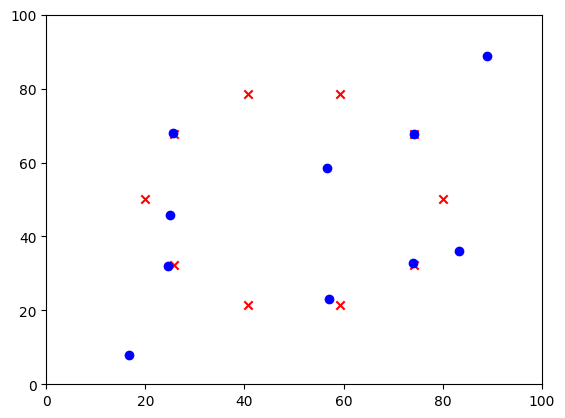

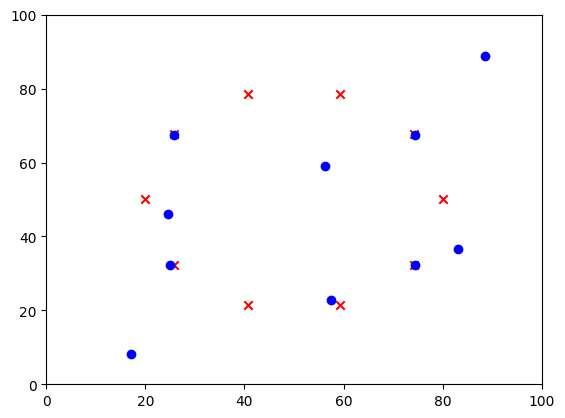

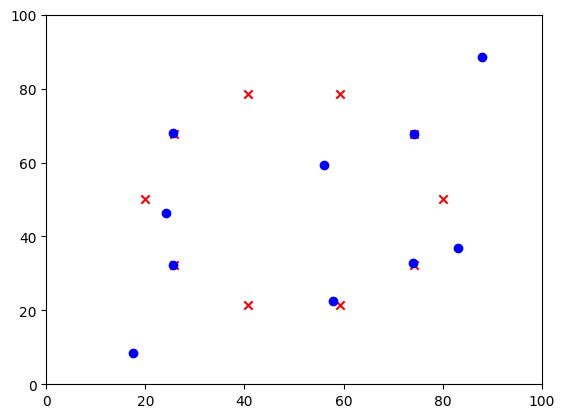

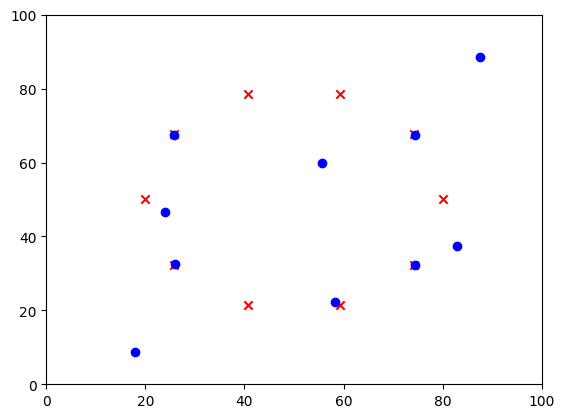

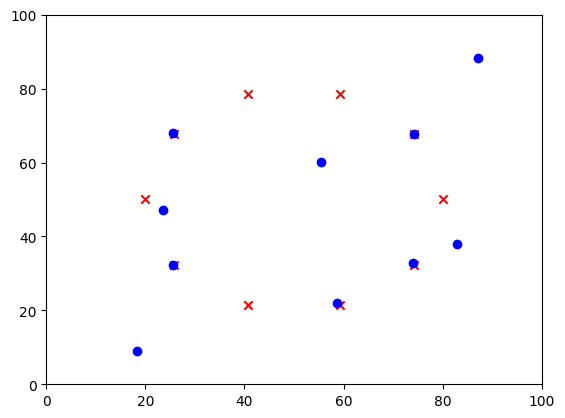

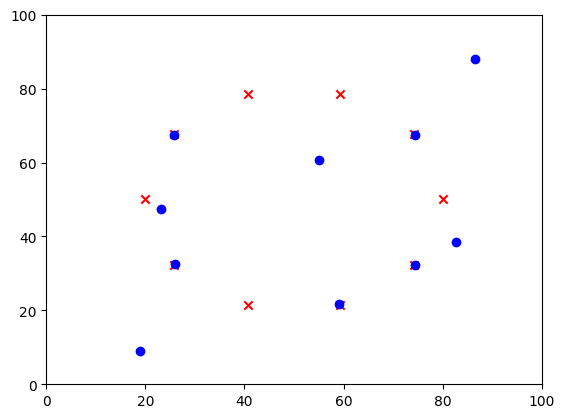

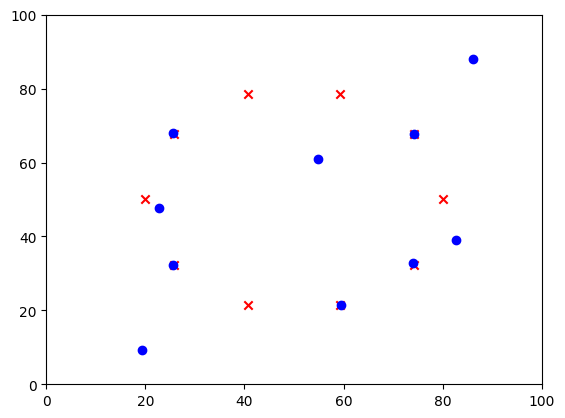

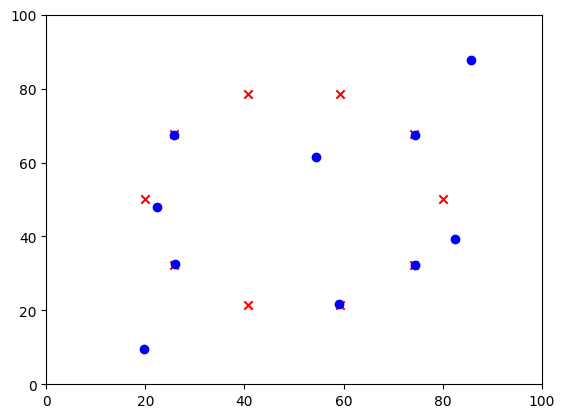

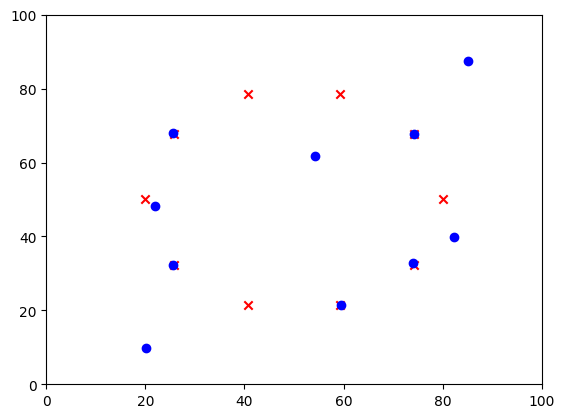

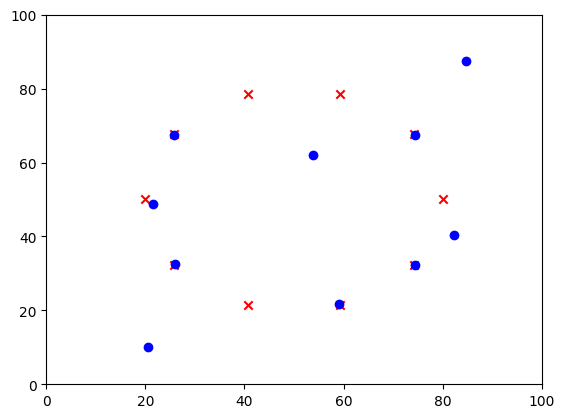

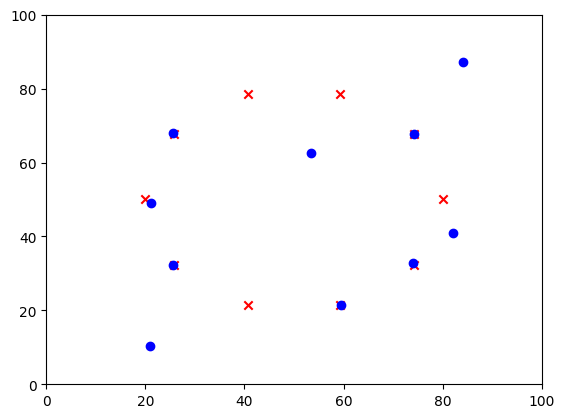

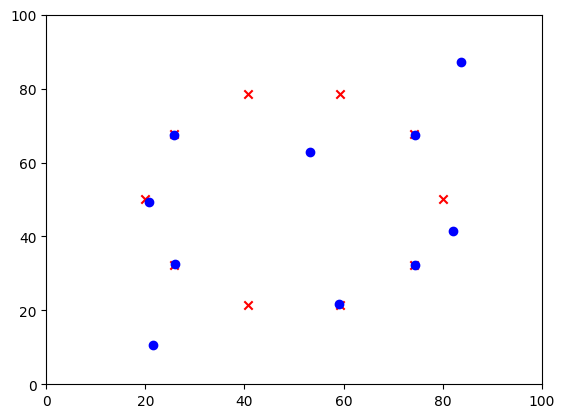

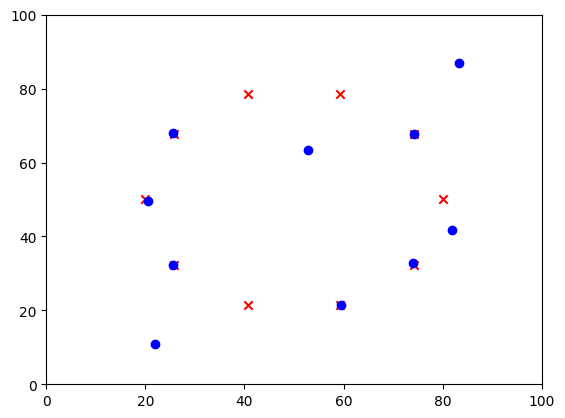

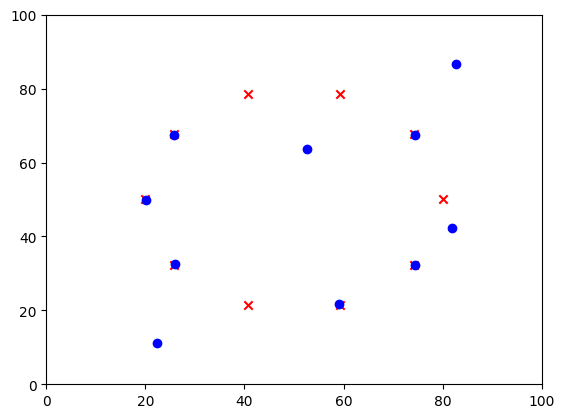

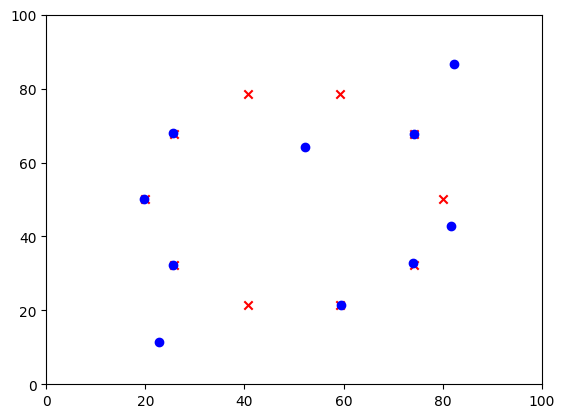

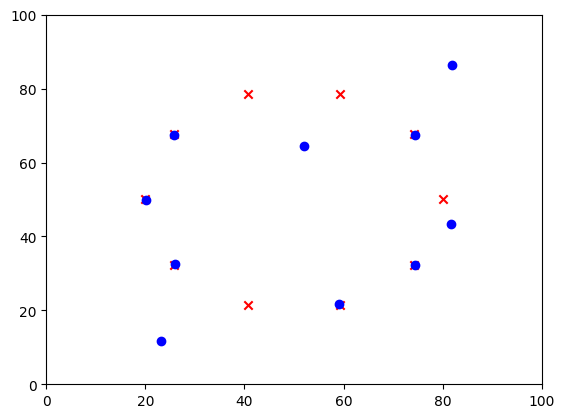

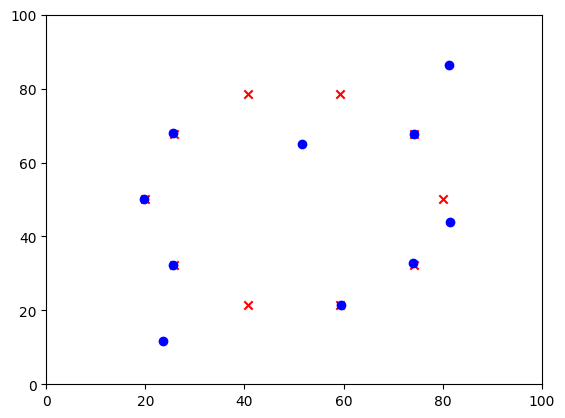

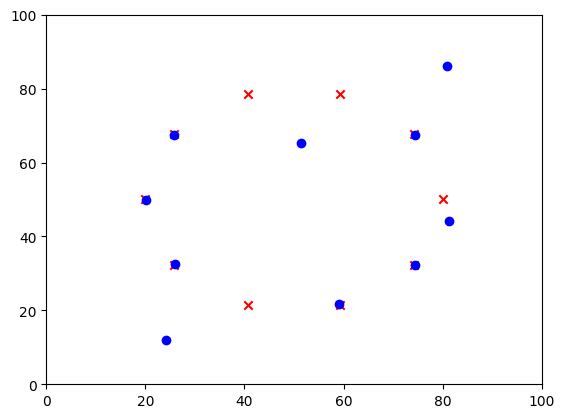

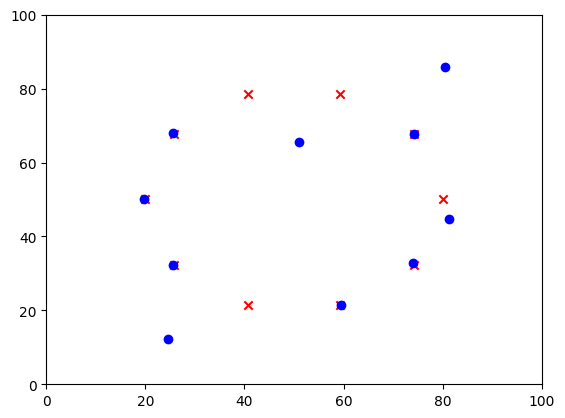

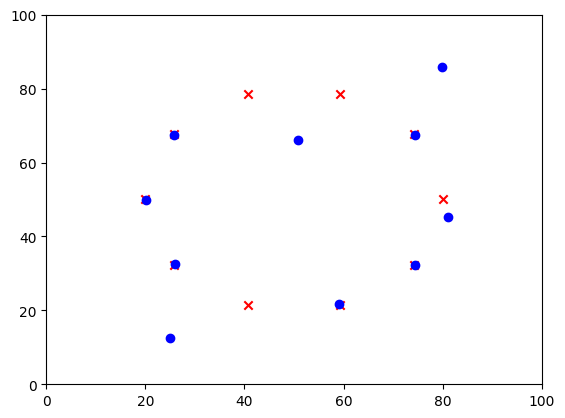

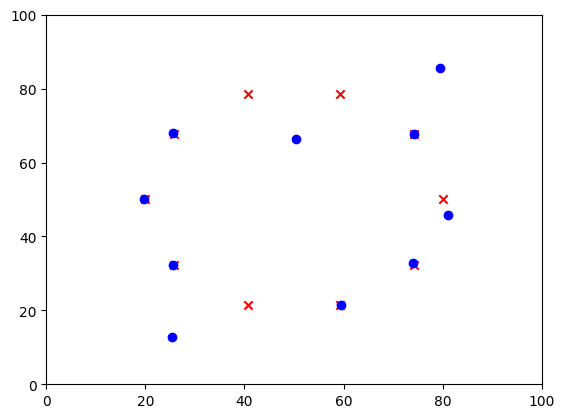

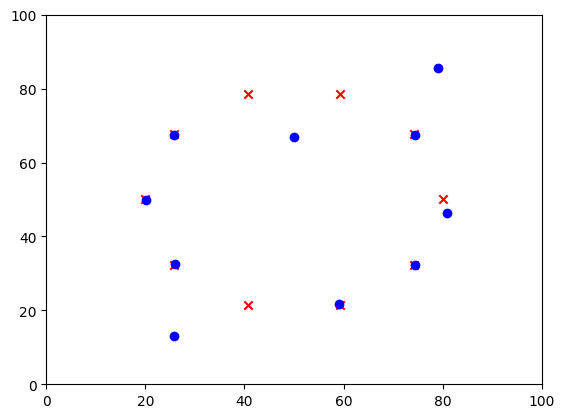

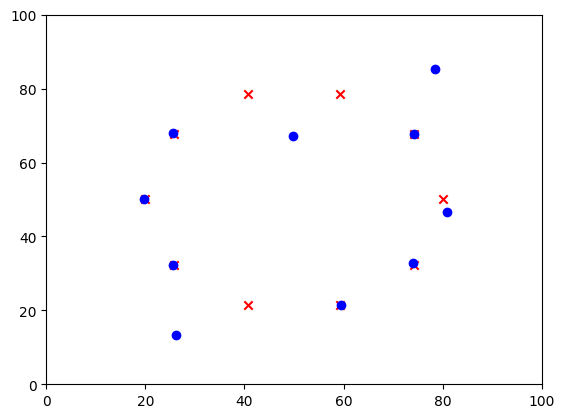

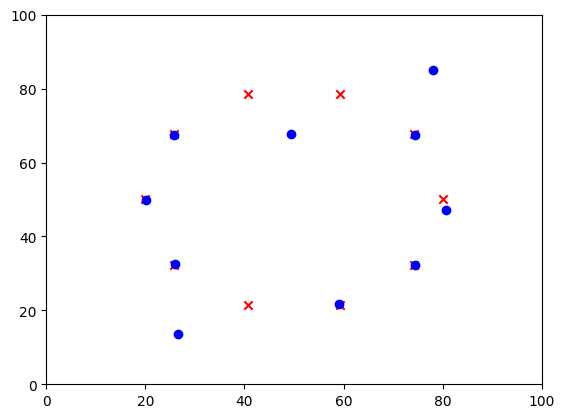

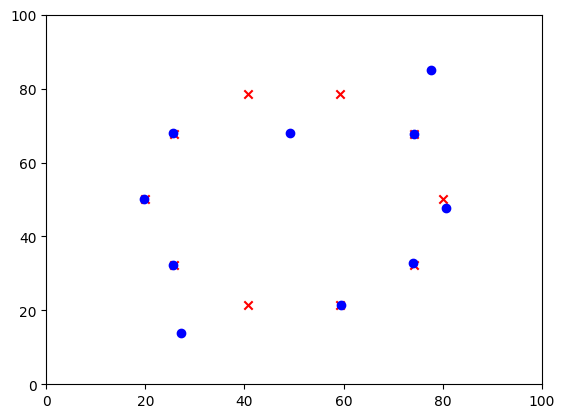

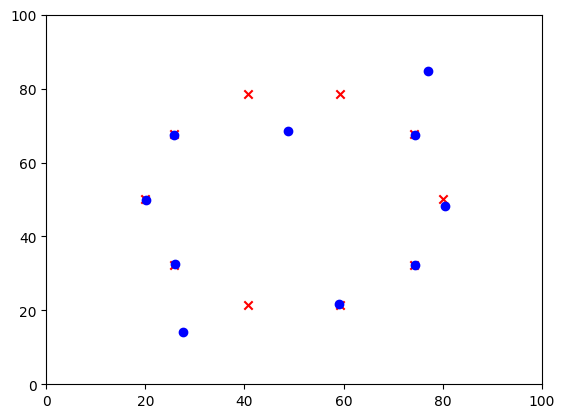

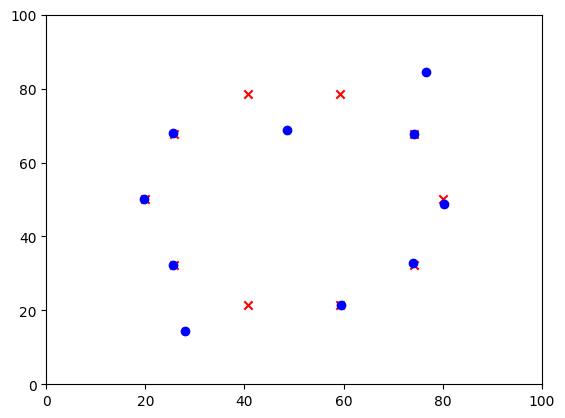

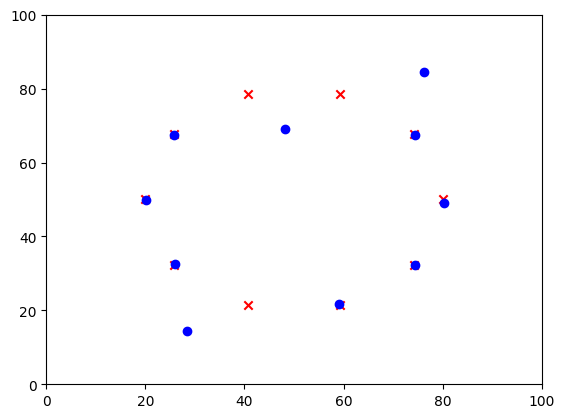

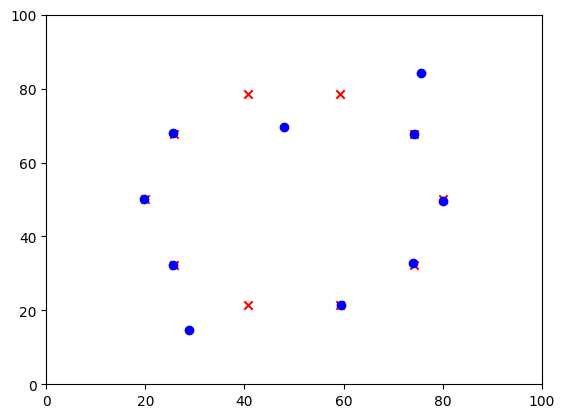

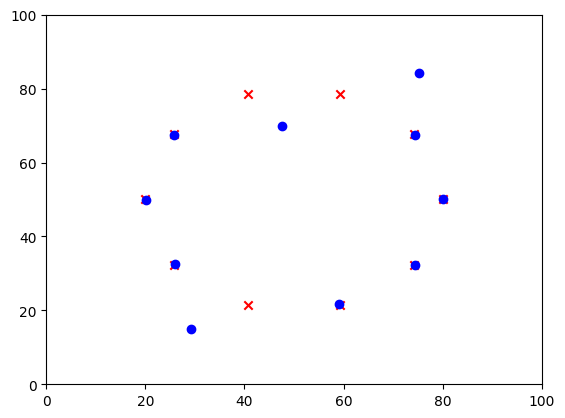

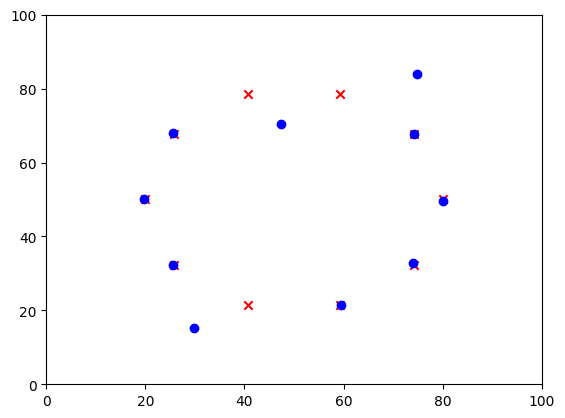

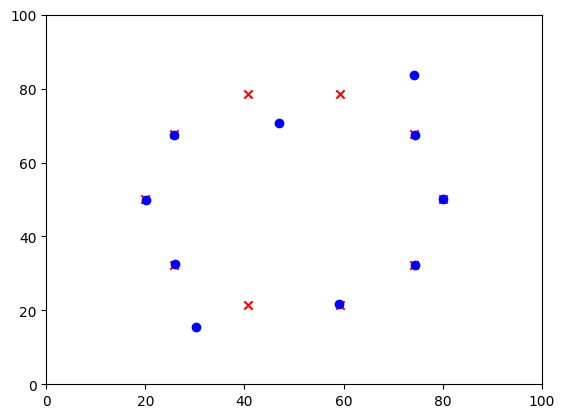

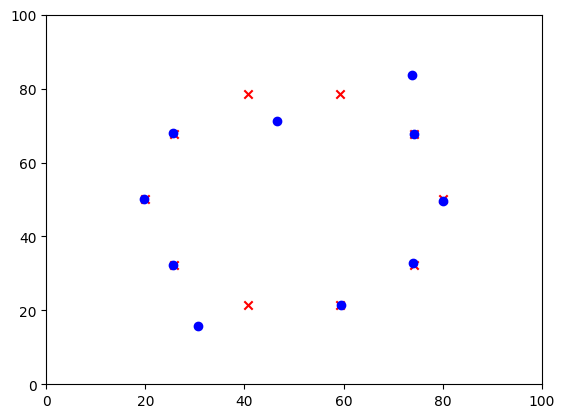

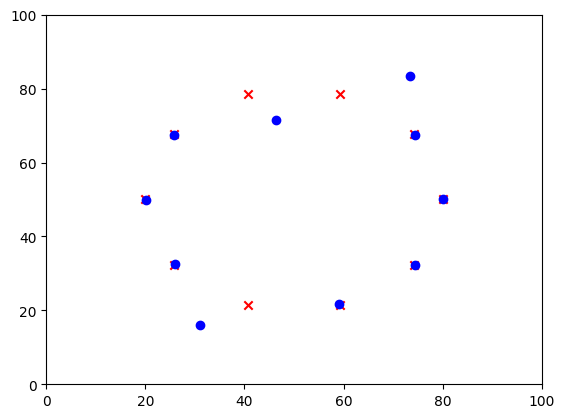

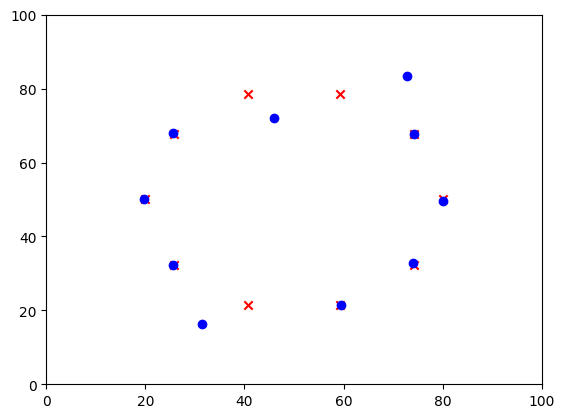

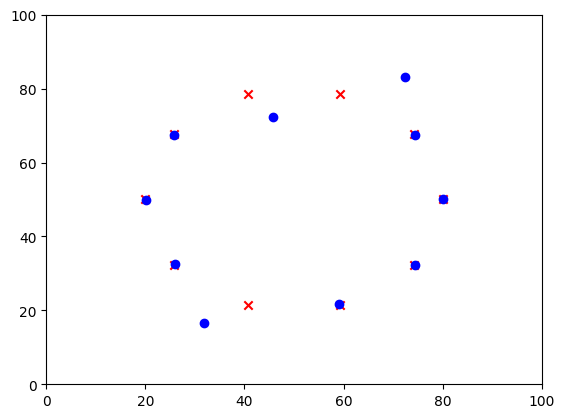

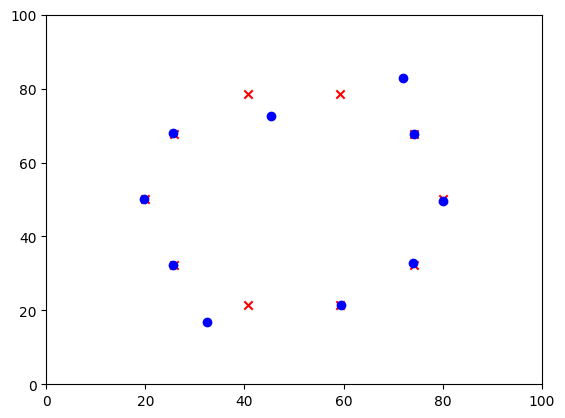

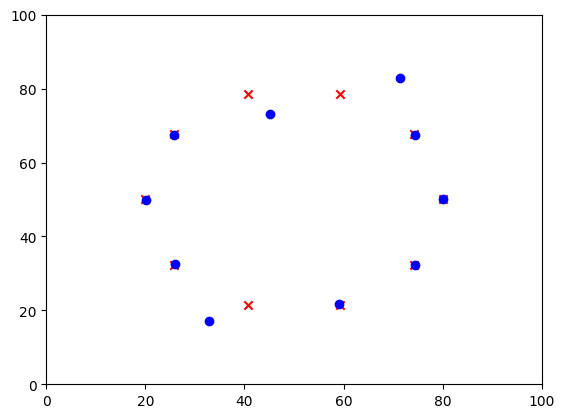

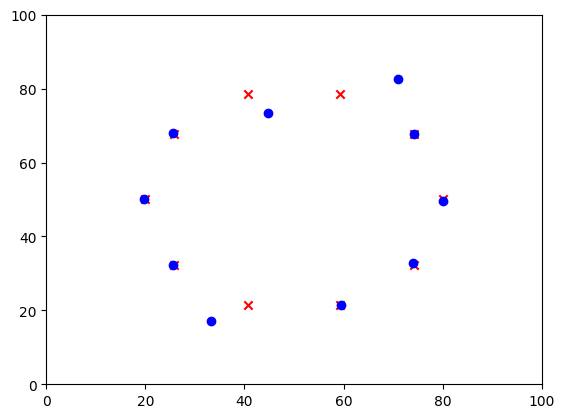

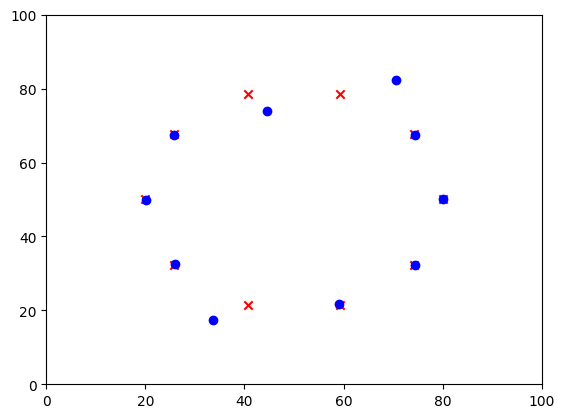

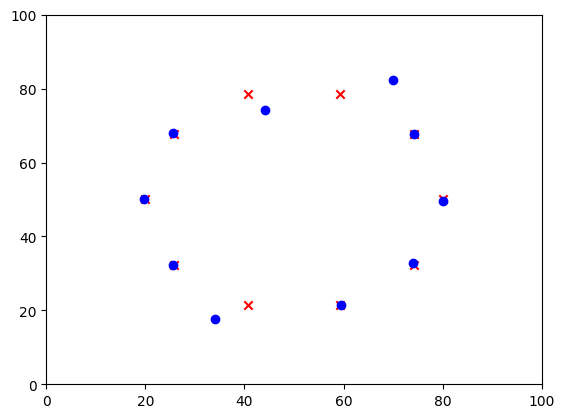

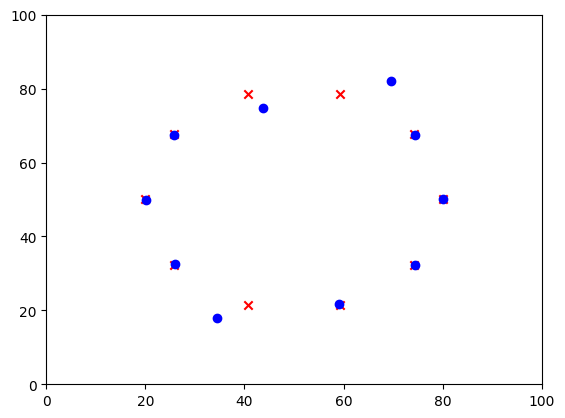

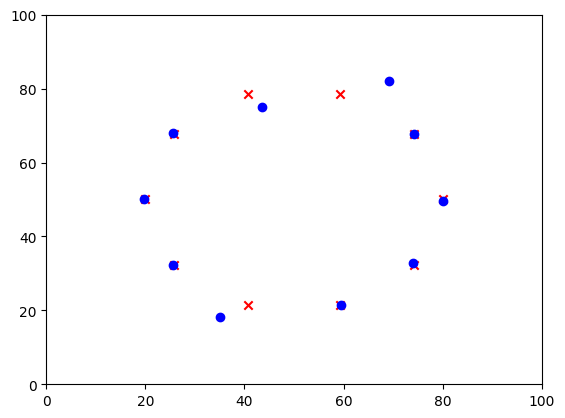

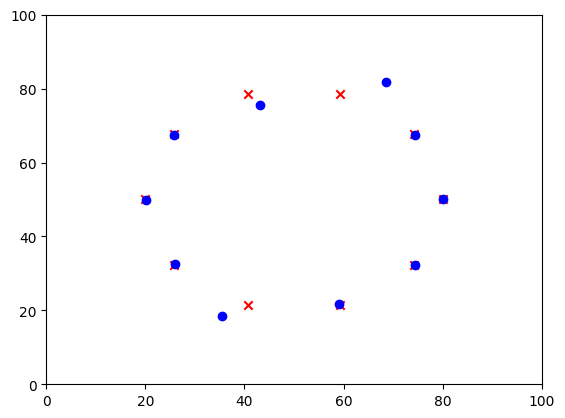

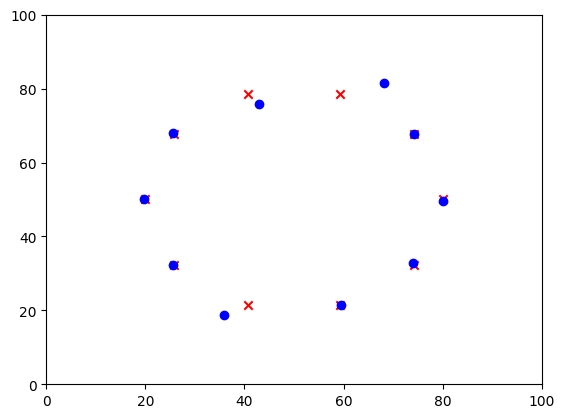

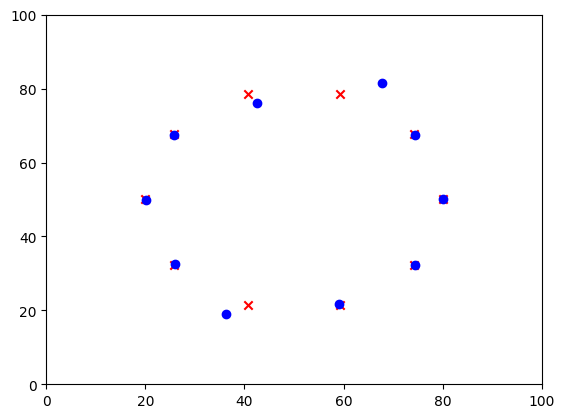

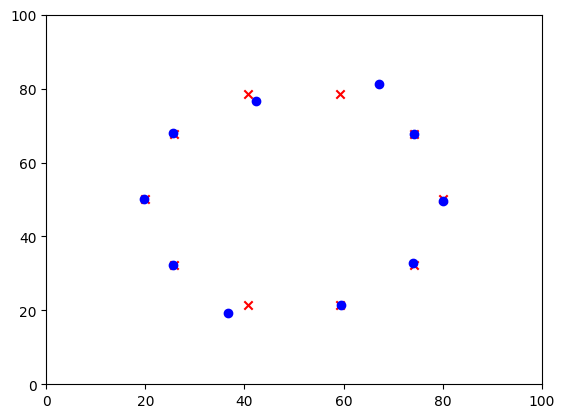

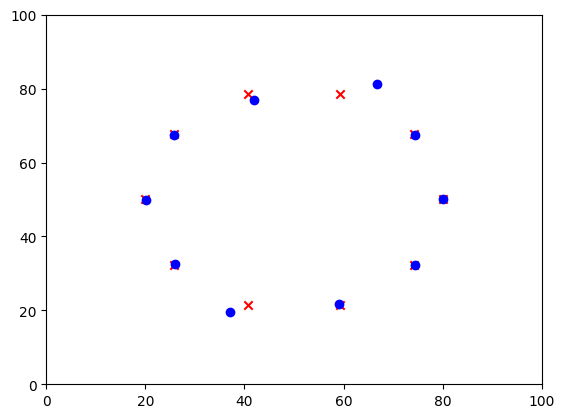

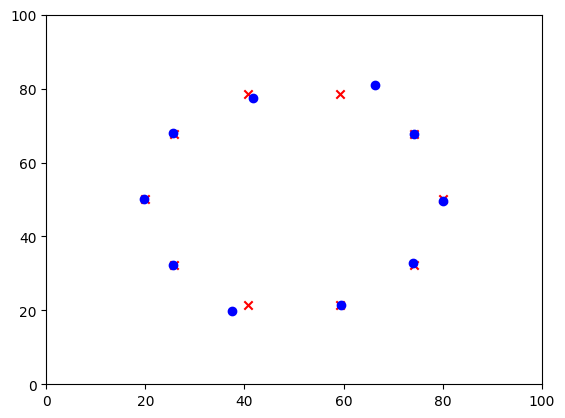

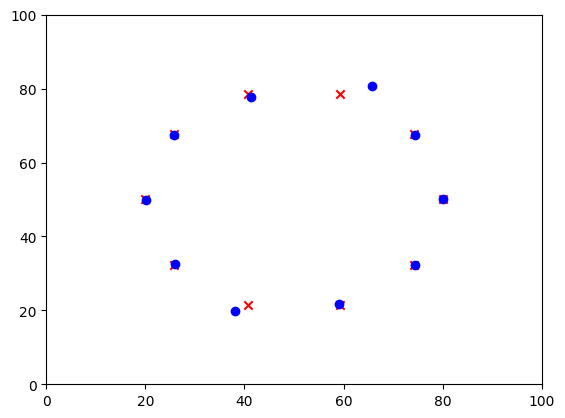

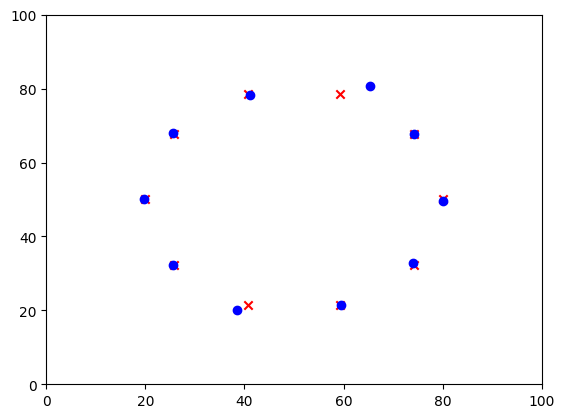

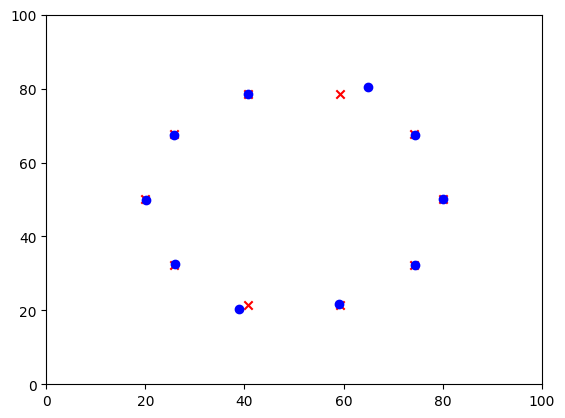

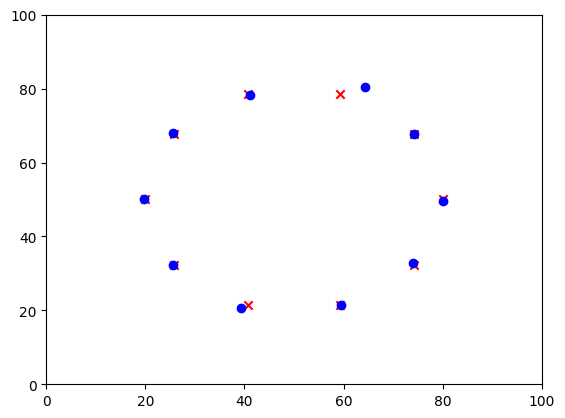

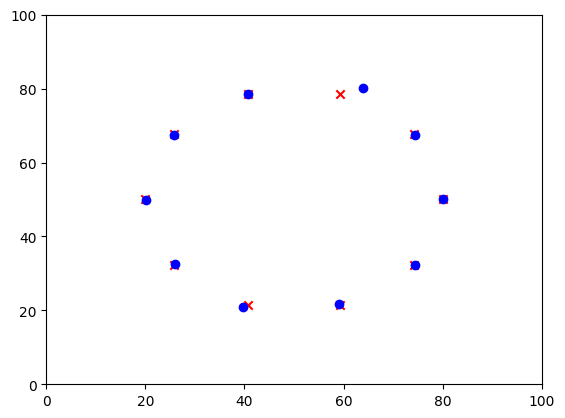

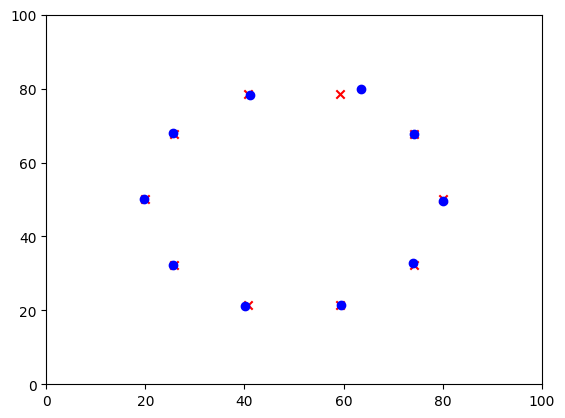

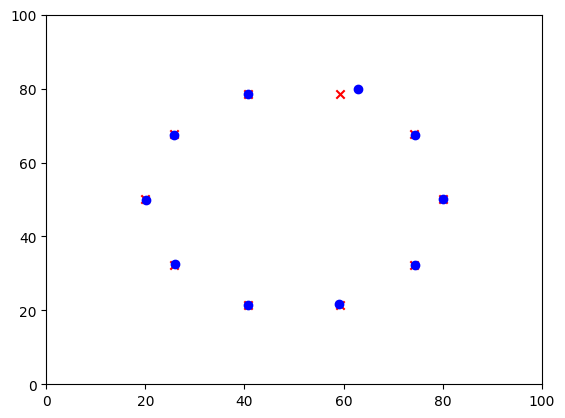

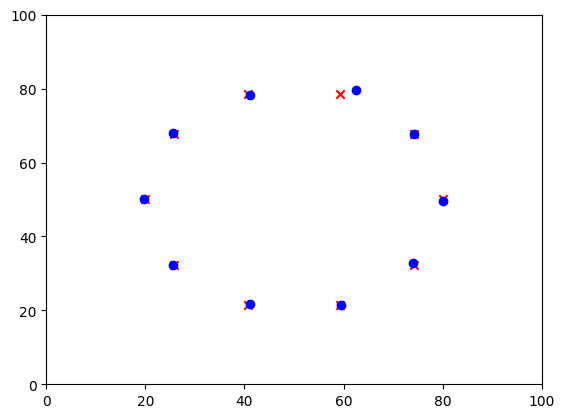

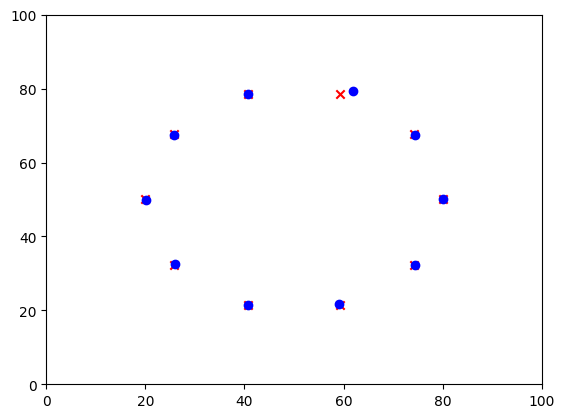

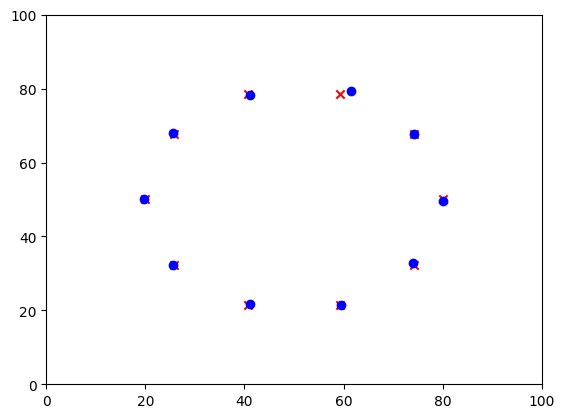

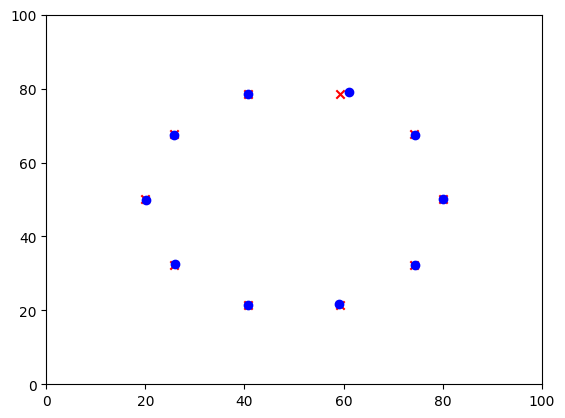

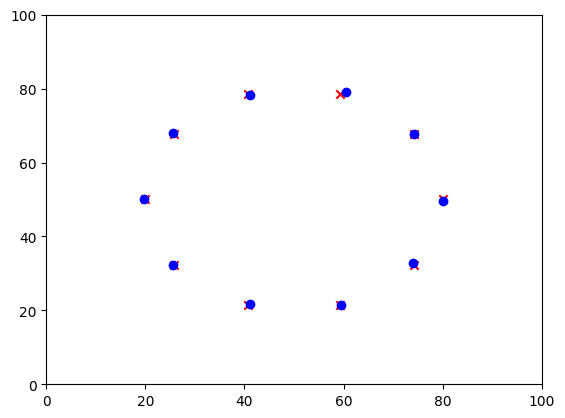

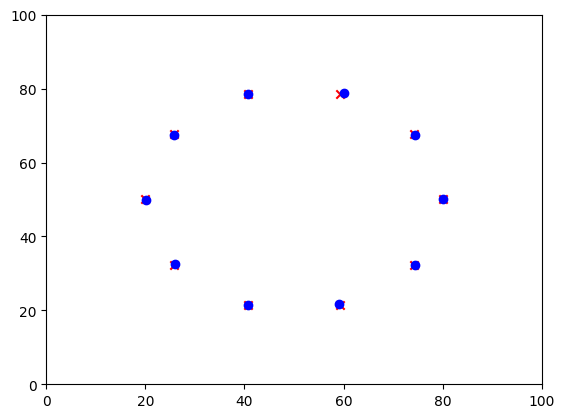

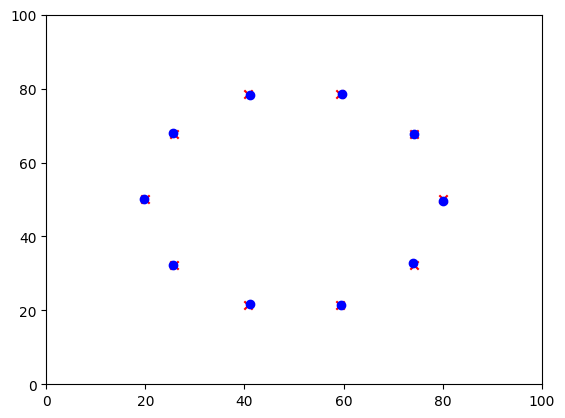

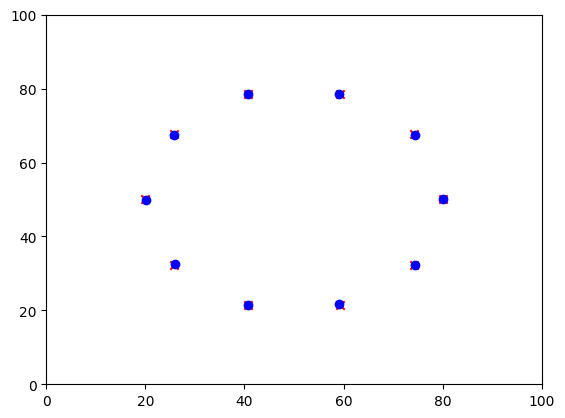

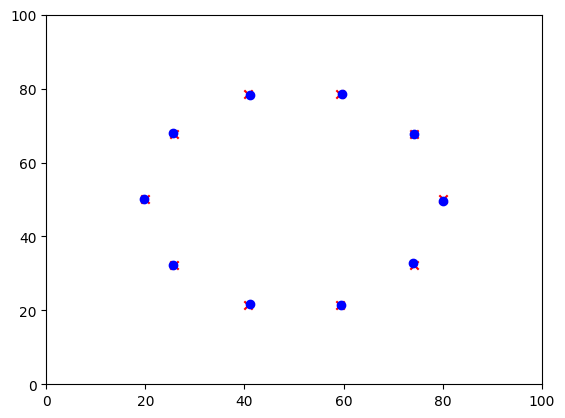

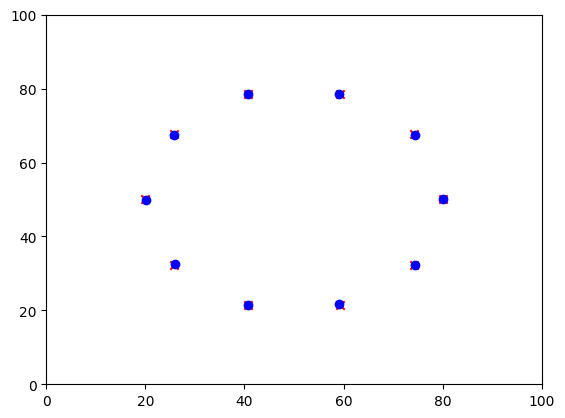

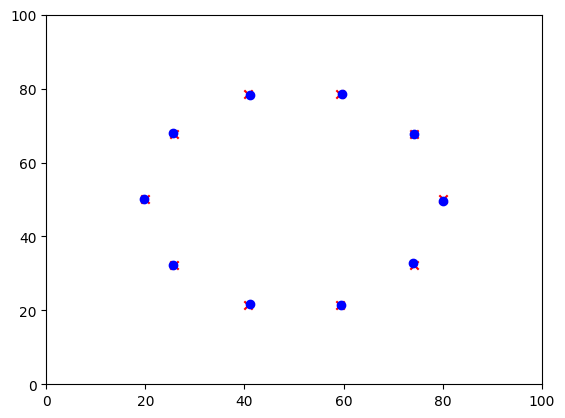

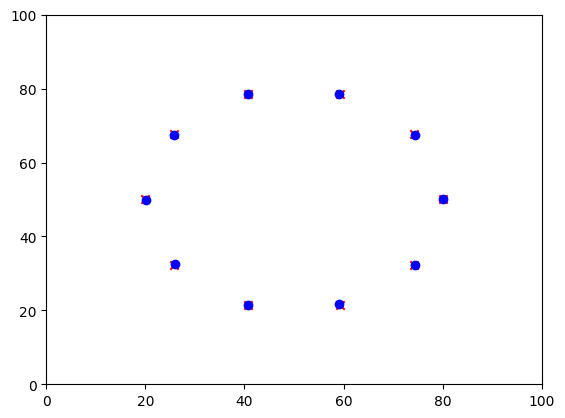

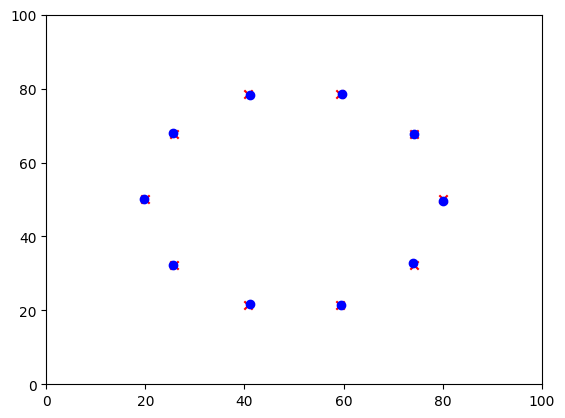

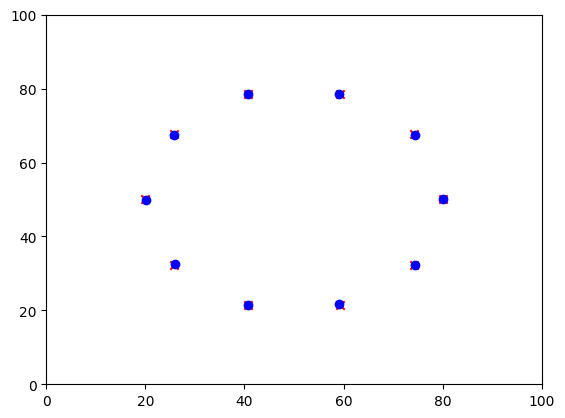

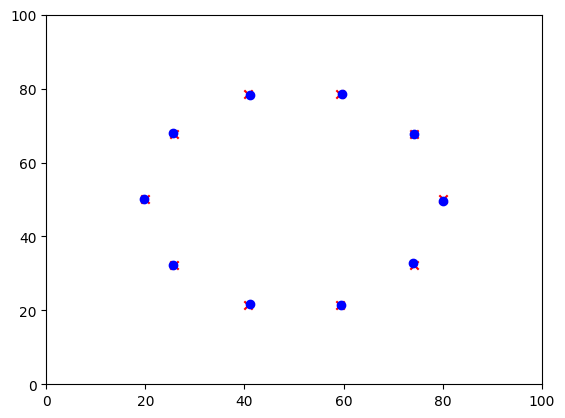

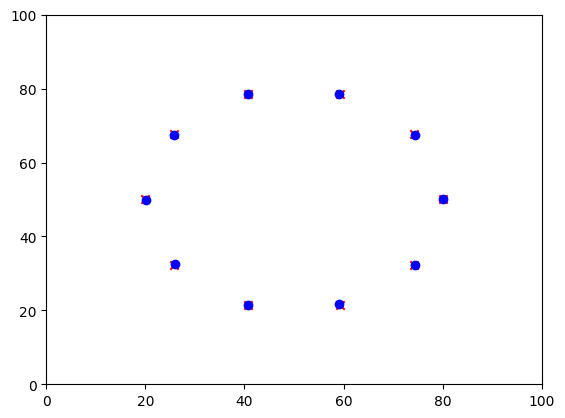

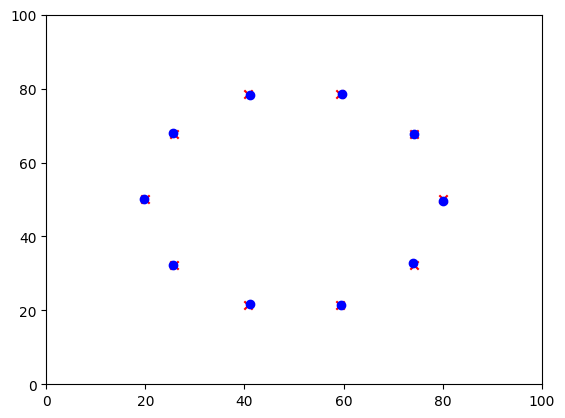

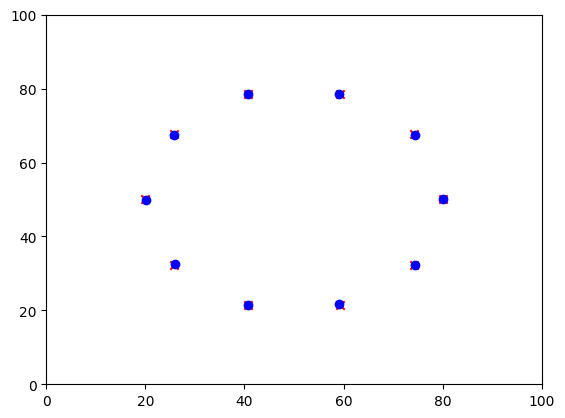

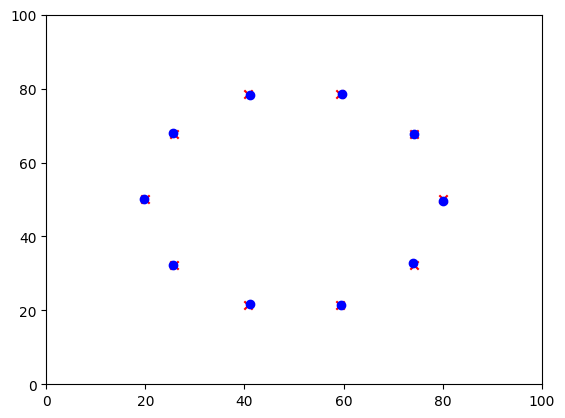

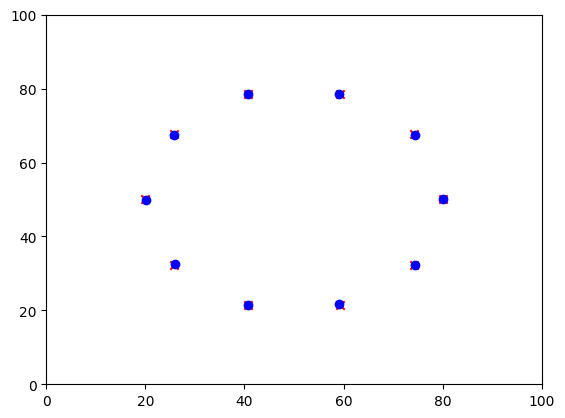

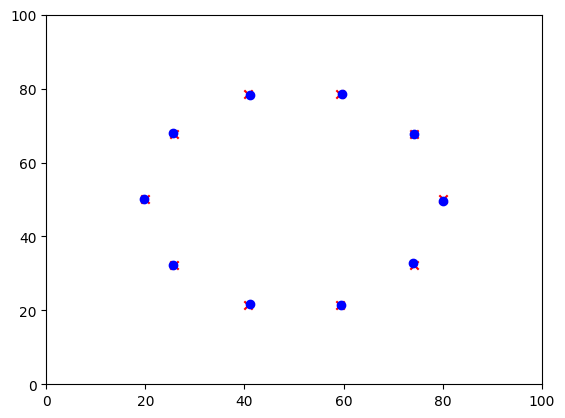

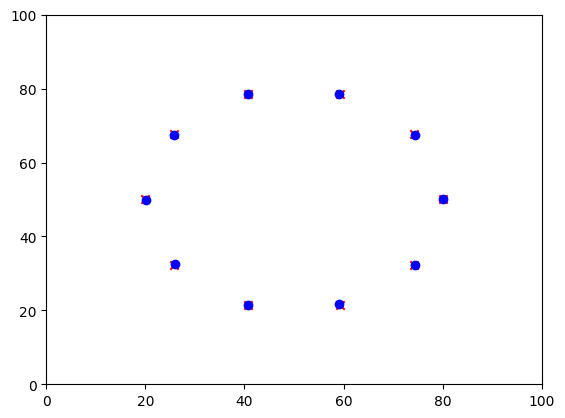

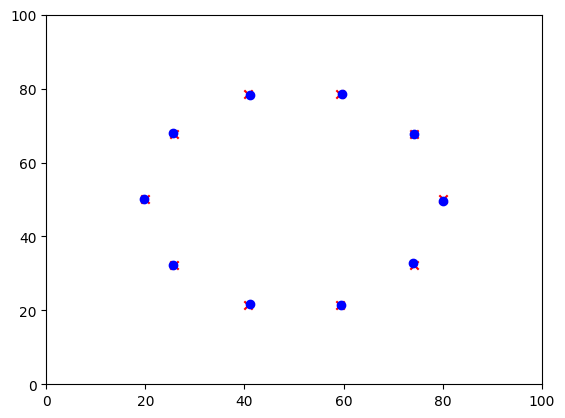

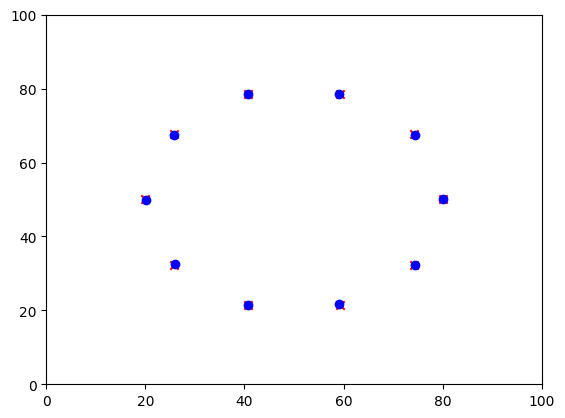

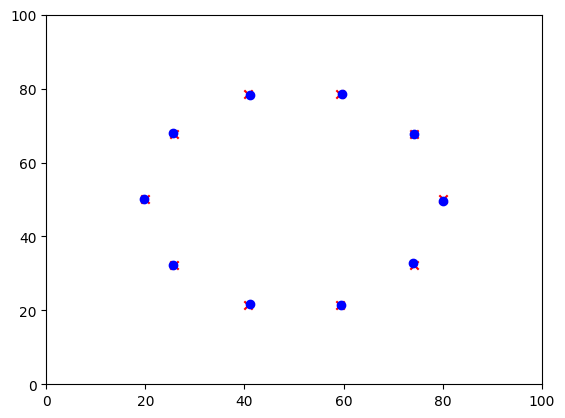

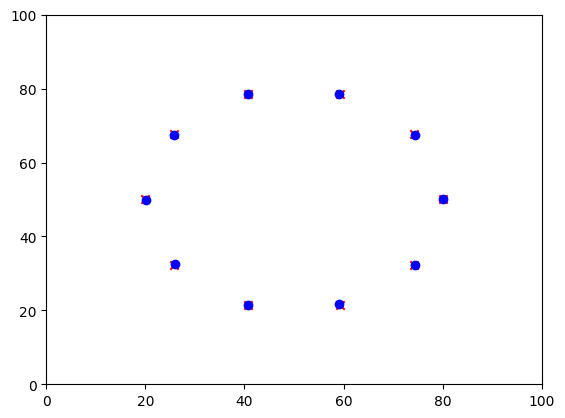

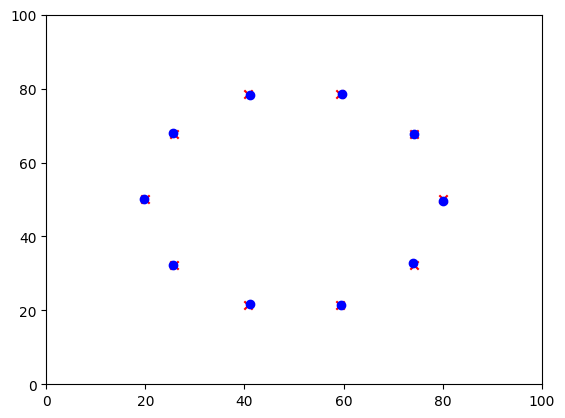

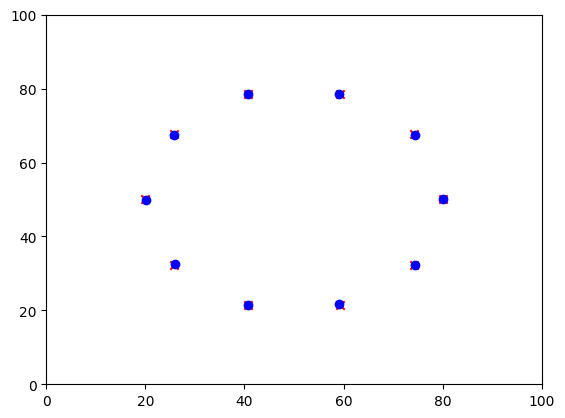

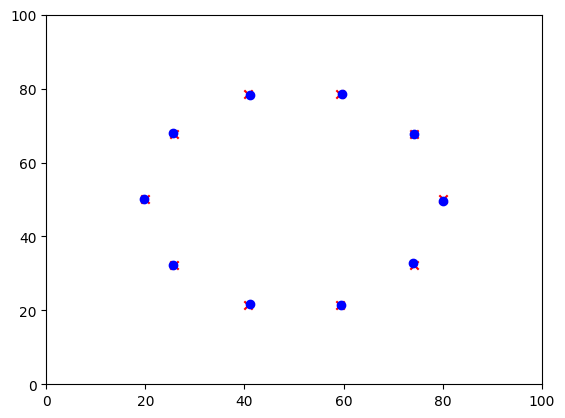

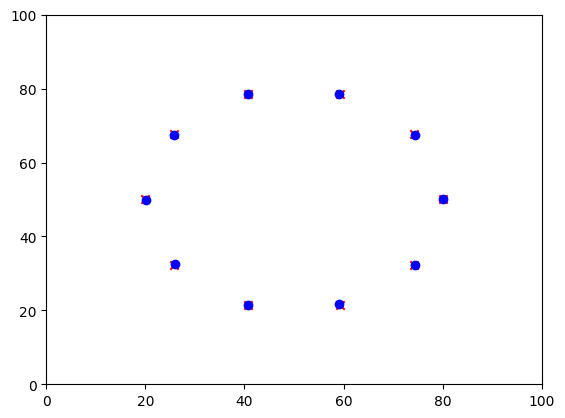

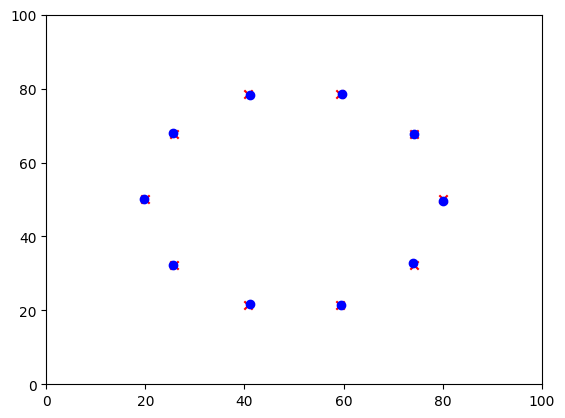

In [9]:
import numpy as np
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt

# Количество дронов
N = 10

# Текущие позиции дронов (случайные)
current_positions = np.random.uniform(0, 100, (N, 2))

# Целевая фигура (например, круг)
angle = np.linspace(0, 2 * np.pi, N, endpoint=False)
radius = 30
target_positions = np.column_stack((50 + radius * np.cos(angle),
                                    50 + radius * np.sin(angle)))

# Построение матрицы стоимости
cost_matrix = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        cost_matrix[i, j] = np.linalg.norm(current_positions[i] - target_positions[j])

# Решение задачи о назначениях
row_ind, col_ind = linear_sum_assignment(cost_matrix)

# Назначение целевых позиций дронам
assignments = {i: col_ind[i] for i in range(N)}

# Визуализация начальных позиций и целевых позиций
plt.figure()
plt.scatter(current_positions[:, 0], current_positions[:, 1], c='blue', label='Текущие позиции')
plt.scatter(target_positions[:, 0], target_positions[:, 1], c='red', marker='x', label='Целевые позиции')
for i in range(N):
    plt.plot([current_positions[i, 0], target_positions[assignments[i], 0]],
             [current_positions[i, 1], target_positions[assignments[i], 1]], 'k--', linewidth=0.5)
plt.legend()
plt.title('Назначение целевых позиций дронам')
plt.show()

# Симуляция движения дронов к целевым позициям
dt = 0.1  # Шаг времени
max_speed = 5  # Максимальная скорость
positions = current_positions.copy()
velocities = np.zeros((N, 2))

for t in range(100):
    plt.clf()
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.scatter(target_positions[:, 0], target_positions[:, 1], c='red', marker='x')
    plt.scatter(positions[:, 0], positions[:, 1], c='blue')
    for i in range(N):
        # Вектор к цели
        desired_velocity = target_positions[assignments[i]] - positions[i]
        distance = np.linalg.norm(desired_velocity)
        if distance > 0:
            desired_velocity = (desired_velocity / distance) * max_speed
        else:
            desired_velocity = np.zeros(2)
        
        # Обновление скорости с учетом простого избегания столкновений
        separation_force = np.zeros(2)
        for j in range(N):
            if i != j:
                dist_ij = np.linalg.norm(positions[i] - positions[j])
                if dist_ij < 5:  # Минимальное безопасное расстояние
                    separation_force += (positions[i] - positions[j]) / dist_ij
        velocities[i] = desired_velocity + separation_force
        
        # Ограничение скорости
        speed = np.linalg.norm(velocities[i])
        if speed > max_speed:
            velocities[i] = (velocities[i] / speed) * max_speed
        
        # Обновление позиции
        positions[i] += velocities[i] * dt
    
    plt.pause(0.01)

plt.show()

**Пояснения к коду:**

- **Матрица стоимости и назначение:** Используется функция `linear_sum_assignment` из библиотеки `scipy.optimize`, которая реализует Венгерский алгоритм для решения задачи о назначениях.
  
- **Планирование траектории:** В данном примере траектории простые и направлены прямо к цели, без учета сложных динамических моделей дронов.
  
- **Избежание столкновений:** Введена простая модель отталкивания при приближении дронов на расстояние меньше 5 единиц.

- **Визуализация:** Используем `matplotlib` для отображения движения дронов и их целей.

**Превращение кода в трехмерный:**

Чтобы адаптировать код для трехмерного пространства (что актуально для дронов в небе), необходимо внести следующие изменения:

- **Изменить размерность координат:** Переход от 2D к 3D координатам. Т.е., массивы `positions`, `velocities`, `current_positions`, `target_positions` должны иметь размерность `(N, 3)`.

- **Обновить генерацию позиций:** Добавить третью координату (высоту) при инициализации текущих и целевых позиций.

- **Обновить расчеты:** Все операции, такие как вычисление расстояния, нормализация векторов, должны быть выполнены в трехмерном пространстве.

- **Визуализация в 3D:** Использовать `mpl_toolkits.mplot3d` для отображения в 3D.



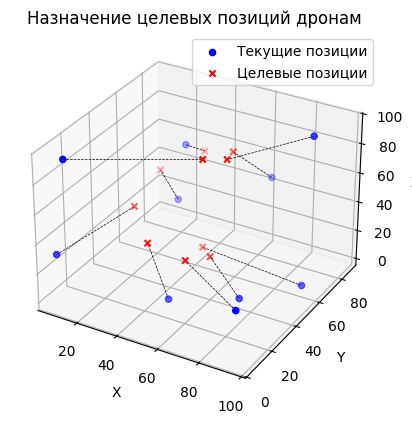

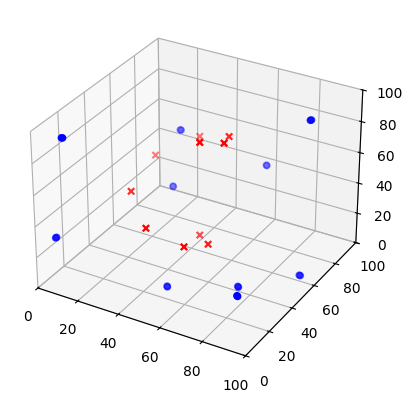

In [10]:
# Обновленный код для трехмерного случая:**

import numpy as np
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Количество дронов
N = 10

# Текущие позиции дронов (случайные в 3D)
current_positions = np.random.uniform(0, 100, (N, 3))

# Целевая фигура (например, сфера)
theta = np.linspace(0, np.pi, N)
phi = np.linspace(0, 2 * np.pi, N)
radius = 30
target_positions = []
for i in range(N):
    x = 50 + radius * np.sin(theta[i]) * np.cos(phi[i])
    y = 50 + radius * np.sin(theta[i]) * np.sin(phi[i])
    z = 50 + radius * np.cos(theta[i])
    target_positions.append([x, y, z])
target_positions = np.array(target_positions)

# Построение матрицы стоимости
cost_matrix = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        cost_matrix[i, j] = np.linalg.norm(current_positions[i] - target_positions[j])

# Решение задачи о назначениях
row_ind, col_ind = linear_sum_assignment(cost_matrix)

# Назначение целевых позиций дронам
assignments = {i: col_ind[i] for i in range(N)}

# Визуализация начальных и целевых позиций
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(current_positions[:, 0], current_positions[:, 1], current_positions[:, 2], c='blue', label='Текущие позиции')
ax.scatter(target_positions[:, 0], target_positions[:, 1], target_positions[:, 2], c='red', marker='x', label='Целевые позиции')
for i in range(N):
    ax.plot([current_positions[i, 0], target_positions[assignments[i], 0]],
            [current_positions[i, 1], target_positions[assignments[i], 1]],
            [current_positions[i, 2], target_positions[assignments[i], 2]], 'k--', linewidth=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title('Назначение целевых позиций дронам')
plt.show()

# Симуляция движения дронов к целевым позициям
dt = 0.1  # Шаг времени
max_speed = 5  # Максимальная скорость
positions = current_positions.copy()
velocities = np.zeros((N, 3))

plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for t in range(100):
    ax.clear()
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_zlim(0, 100)
    ax.scatter(target_positions[:, 0], target_positions[:, 1], target_positions[:, 2], c='red', marker='x')
    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='blue')
    for i in range(N):
        # Вектор к цели
        desired_velocity = target_positions[assignments[i]] - positions[i]
        distance = np.linalg.norm(desired_velocity)
        if distance > 0:
            desired_velocity = (desired_velocity / distance) * max_speed
        else:
            desired_velocity = np.zeros(3)
        
        # Обновление скорости с учетом простого избегания столкновений
        separation_force = np.zeros(3)
        for j in range(N):
            if i != j:
                dist_ij = np.linalg.norm(positions[i] - positions[j])
                if dist_ij < 5:  # Минимальное безопасное расстояние
                    separation_force += (positions[i] - positions[j]) / dist_ij
        velocities[i] = desired_velocity + separation_force
        
        # Ограничение скорости
        speed = np.linalg.norm(velocities[i])
        if speed > max_speed:
            velocities[i] = (velocities[i] / speed) * max_speed
        
        # Обновление позиции
        positions[i] += velocities[i] * dt
    
    # Обновление графика
    ax.scatter(target_positions[:, 0], target_positions[:, 1], target_positions[:, 2], c='red', marker='x')
    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='blue')
    plt.pause(0.01)

plt.ioff()
plt.show()

**Примечания к трехмерному коду:**

- **Формирование целевой фигуры:** Используется сфера, но можно задать любую фигуру, определив соответствующие координаты.

- **Визуализация в 3D:** Используется `mpl_toolkits.mplot3d` для отображения трехмерного пространства.

- **Динамика движения:** Дроны движутся в трехмерном пространстве, и для избегания столкновений учитывается расстояние во всех трех измерениях.

**Дополнительные аспекты:**

- **Управление дронами в реальном времени:** В реальной системе необходимо учитывать физику полета дронов, их инерцию, ограничения по ускорению и т.д.

- **Обработка сенсорных данных:** Использование реальных сенсоров для обнаружения других дронов и препятствий.

- **Коммуникация:** Обмен данными между дронами с минимальной задержкой для координации.

- **Стабильность фигуры:** После достижения целевых позиций дроны должны удерживать форму, компенсируя внешние воздействия (ветер и т.д.).

**Заключение:**

Алгоритм управления роем беспилотников для формирования заданной фигуры в небе включает в себя несколько ключевых компонентов: назначение целей, планирование траекторий, управление движением, избегание столкновений и синхронизацию. Приведенный пример демонстрирует базовый подход к решению этой задачи.

**Рекомендуемая литература и ресурсы:**

- **Книги:**
  - "Swarm Robotics: From Biology to Robotics" — Сабри Тосуноглу и др.
  - "Formation Control of Multi-Agent Systems" — Магди Саад и др.

- **Статьи:**
  - "Formation Control for Unmanned Aerial Vehicles" — обзор современных методов.
  - "Survey of Autonomous Formation Flight Methods" — анализ различных подходов к управлению формациями дронов.

- **Онлайн ресурсы:**
  - Проекты с открытым исходным кодом для управления роем дронов, такие как **PX4 Swarm** или проекты на базе **ROS** (Robot Operating System).
  - Видео презентации компаний, занимающихся световыми шоу с дронами, например, Intel Drone Light Shows.

// https://docs.px4.io/main/en/
// https://github.com/alireza787b/mavsdk_drone_show
// https://px4.io


